In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [4]:
print(tf.__version__)#ternsrflow version checking

2.8.0


In [5]:
# loading training dataset from local directory "natural Images" from local system using tensorflow and keras.
train_ds = tf.keras.utils.image_dataset_from_directory(
  'natural_images',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(128, 128),
  batch_size=32)

Found 6899 files belonging to 8 classes.
Using 5520 files for training.


In [6]:
# loading validation dataset which is used to test the model performance
val_ds = tf.keras.utils.image_dataset_from_directory(
  'natural_images',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(128, 128),
  batch_size=32)

Found 6899 files belonging to 8 classes.
Using 1379 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)
#retrieving class names from the dataset

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


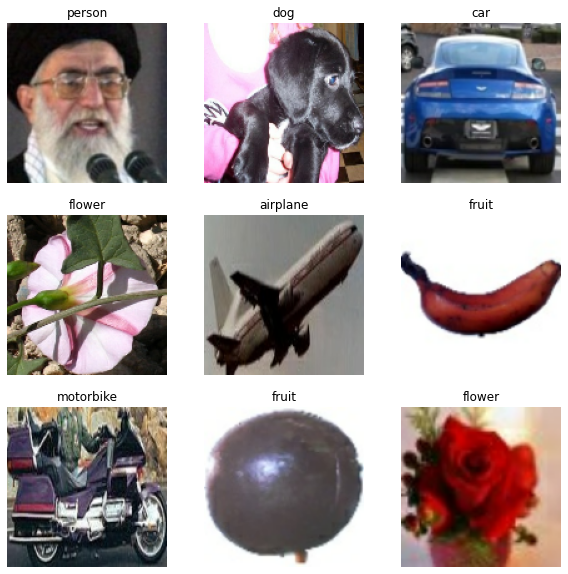

In [8]:
# have a look at some images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# defining model architecture of the model.
# we built the model with 6 layers of neural network. initially we will be rescaling the images by normalizing it. the normalizing 
#is usually done by dividing the each pixel value by 255. In our model we used activation fucntion "relu" and a flattening layer.

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(8)
])

In [ ]:
# model compilation. now we compile our model with ADAM optimizer and loss function crossentropy.
# we used accuracy as metrics here.
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
# training for 100 epochs. Now we fit the model on the training dataset and validation data.

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100
)

Epoch 1/100
172/172 [==============================] - 545s 3s/step - loss: 0.7516 - accuracy: 0.7212 - val_loss: 0.3562 - val_accuracy: 0.8709
Epoch 2/100
172/172 [==============================] - 12s 67ms/step - loss: 0.3088 - accuracy: 0.8827 - val_loss: 0.3538 - val_accuracy: 0.8556
Epoch 3/100
172/172 [==============================] - 12s 68ms/step - loss: 0.1930 - accuracy: 0.9272 - val_loss: 0.3579 - val_accuracy: 0.8760
Epoch 4/100
172/172 [==============================] - 12s 67ms/step - loss: 0.1471 - accuracy: 0.9429 - val_loss: 0.2160 - val_accuracy: 0.9154
Epoch 5/100
172/172 [==============================] - 12s 69ms/step - loss: 0.0985 - accuracy: 0.9641 - val_loss: 0.2228 - val_accuracy: 0.9176
Epoch 6/100
172/172 [==============================] - 12s 68ms/step - loss: 0.0709 - accuracy: 0.9737 - val_loss: 0.2826 - val_accuracy: 0.9154
Epoch 7/100
172/172 [==============================] - 12s 66ms/step - loss: 0.0731 - accuracy: 0.9732 - val_loss: 0.2965 - val_acc

In [ ]:
model.save('my_model_100.h5') # we are saving this model for application building. .h5 is the extension for the model file.

In [12]:
#now that we have saved the model, there is no need to run the whole notebook again and again
# we can load the model by using load_model fucntion. 

model = load_model('my_model_100.h5')

class_names = ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [13]:
# function to make predictions from a single image
def make_prediction(image_path): #image path is given as parameter
    img = image.load_img(image_path, target_size = (128, 128)) #laoding image
    img = image.img_to_array(img) 
    img = np.expand_dims(img, axis = 0)
    return class_names[np.argmax(model.predict(img)[0])] #predicting image with the help of model

    #this fucntion returns the class of the image which it belongs to.

In [14]:
# calling make_prediction fucntion to predict the user image.
x = make_prediction('natural_images/car/car_0001.jpg') #loading user input image to make prediction



In [15]:
print(x) #image class is returned in string type and stored in variable X, so we can print the X to see the predicted  class.

car
